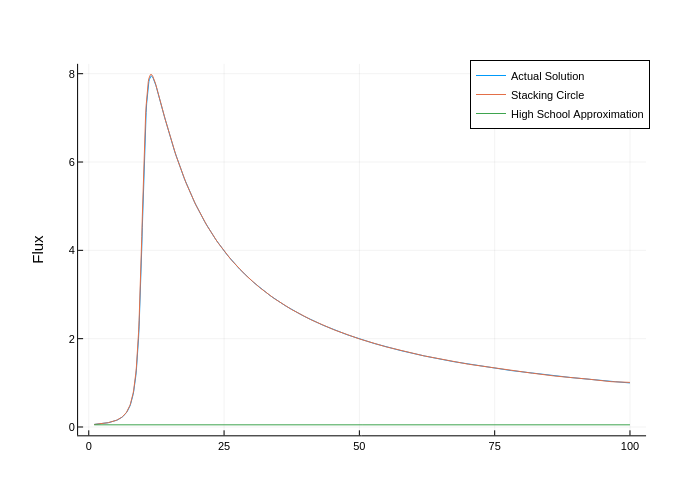

In [1]:
using Plots; plotlyjs()

global magneticPermeability = 1

fluxSolenoid(winding, solenoidHeight, solenoidRadius, magnetHeight, magnetMoment) = magneticPermeability * magnetMoment * winding / (2 * solenoidHeight) * ((solenoidHeight - magnetHeight) / sqrt(solenoidRadius^2 + (solenoidHeight - magnetHeight)^2) + magnetHeight / sqrt(solenoidRadius^2 + magnetHeight^2))
function fluxCircleStack(winding, solenoidHeight, solenoidRadius, magnetHeight, magnetMoment)
	term = 0
	for i in 1:winding
		term += (solenoidRadius^2 + (magnetHeight - i * solenoidHeight / winding)^2)^(-3/2)
	end
	return term * solenoidRadius^2 * magneticPermeability * magnetMoment / 2
end
fluxCircle(winding, solenoidHeight, solenoidRadius, magnetHeight, magnetMoment) = winding * solenoidRadius^2 * magneticPermeability * magnetMoment / 2 * (solenoidRadius^2 + magnetHeight^2)^(-3/2)

winding = 100
solenoidHeight = 5
solenoidRadius = 1
magnetHeight = 10
magnetMoment = 1

# solenoidRadius = collect(1:10)
solenoidHeight = collect(1:0.1:100)

fluxSolArr = fluxSolenoid.(winding, solenoidHeight, solenoidRadius, magnetHeight, magnetMoment)
fluxCirStackArr = fluxCircleStack.(winding, solenoidHeight, solenoidRadius, magnetHeight, magnetMoment)
fluxCirArr = fluxCircle.(winding, solenoidHeight, solenoidRadius, magnetHeight, magnetMoment)

plot(solenoidHeight, [fluxSolArr fluxCirStackArr fluxCirArr], label = ["Actual Solution" "Stacking Circle" "High School Approximation"], ylabel = "Flux", legend = :topright)

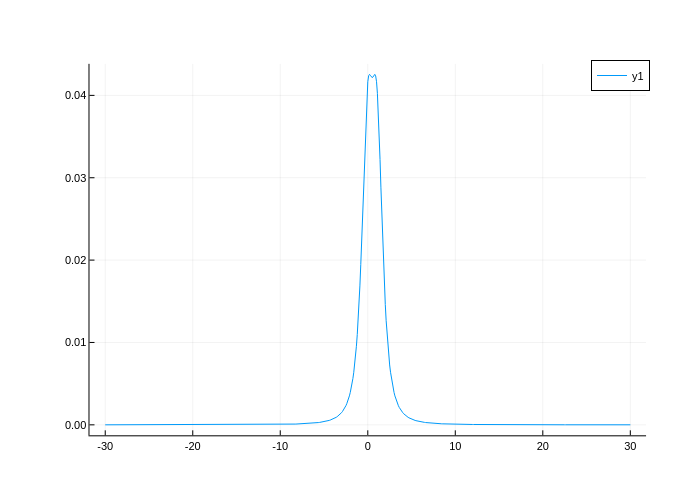

In [28]:
func(α, ω, R, H, h) = cos(ω * α) / (R^2 + (H/(2π) * α - h)^2)^(3/2)

# intFunc(10, 10, 1, 1, 2)

# Numerical integrations
resolution = 100
global dx = 2π/resolution
function intFunc(ω, R, H, h)
	sol = 0
	for i in range(0, 2π, length = resolution)
		dA = dx * intFunc(i, ω, R, H, h)
		sol += dA
	end
	return sol
end

intCol = collect(-30:0.1:30)
intArray = intFunc.(10, 1, 1, intCol)
plot(intCol, intArray)